# Analysis of Conflict On The African Content

##### Context : The Armed Conflict Location & Event Data Project aims to track armed conflict around the world by recording the groups attacking, where they occurred and any other details about the conflict.The dataset we will be dealing with in this analysis contains conflict data about the African continent only.

#### Research Question : Are there any temporal patterns in conflict events, and how have these patterns changed over time ?

Subquestions To Analyse :
1.Is there  a seasonal pattern in the frequency of conflict events.
2.How has conflict frequency changed over time ?
3.Are there any regional differences in the temporal patterns of conflict events
4.

#### Data Wrangling

In [2]:
#Import the relevant libraries and datasets

import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("ACLED Africa 1997-2022.csv")

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Visual Assessment of the dataset
data

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,9713929,180,DRC27764,27764,31 December 2022,2022,1,Battles,Armed clash,M23: March 23 Movement,...,Kamatembe,-1.4011,28.5950,1,Mediacongo.net; Radio Okapi; RFI; Twitter,New media-National,"On 31 December 2022, during a two-day battle, ...",0,1673291085,COD
1,9713930,180,DRC27765,27765,31 December 2022,2022,1,Strategic developments,Other,East African Community Joint Regional Force to...,...,Kibumba,-1.4823,29.3460,1,7 Sur 7; Actualite; Election-Net; La Prunelle;...,New media-National,"Other: On 31 December 2022, the leadership of ...",0,1673291085,COD
2,9713931,180,DRC27766,27766,31 December 2022,2022,1,Violence against civilians,Abduction/forced disappearance,Twirwaneho Ethnic Militia (Democratic Republic...,...,Mikenge,-3.4497,28.4476,1,Kivu Times,Subnational,"On 31 December 2022, Twirwaneho abducted a wom...",0,1673291085,COD
3,9713933,180,DRC27768,27768,31 December 2022,2022,1,Battles,Armed clash,M23: March 23 Movement,...,Karenga,-1.4724,29.0655,2,Mediacongo.net; Radio Okapi,National,"On 31 December 2022, during a two-day battle, ...",0,1673291085,COD
4,9714388,231,ETH9524,9524,31 December 2022,2022,2,Violence against civilians,Attack,Police Forces of Ethiopia (2018-) Oromo Region...,...,Dupa,8.5807,35.5128,2,Oromiya Media Network,International,"Around 31 December 2022 (as reported), governm...",3,1673291087,ETH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305474,9695770,694,SIE2,2,01 January 1997,1997,3,Battles,Government regains territory,Military Forces of Sierra Leone (1996-1997),...,Mandu,8.4642,-10.9332,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,1670286851,SLE
305475,9695771,694,SIE3,3,01 January 1997,1997,3,Battles,Armed clash,Kamajor Militia,...,Selenga,8.1221,-11.7047,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,1670286851,SLE
305476,9695772,694,SIE6,6,01 January 1997,1997,3,Violence against civilians,Attack,Military Forces of Sierra Leone (1996-1997),...,York Island,7.5317,-12.4694,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,1670286851,SLE
305477,9695773,694,SIE7,7,01 January 1997,1997,3,Battles,Armed clash,Kamajor Militia,...,Fakunya,8.2310,-12.3380,2,SL-LED; No Peace Without Justice,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,1670286851,SLE


**Observations**
Remove columns that might be irrelevant to our analysis : ["iso","event_id_cnty","event_id_no_cnty","iso3"]
Seperate the event_date column into day,month and year .To aid in more granular analysis
Convert the inter1 and inter2 codes into thier actual names to make the data categorical

##### Programmatic Assessment Of The Data

In [4]:
#first create a copy of the data so that we can always get it after we have modified some columns and values
df = data.copy()

In [5]:
#Get dimensions of data and see the column types and null values
print(f"Dimensions : {data.shape}")
for col in df.columns:
    print(f" Column : {col :35} | type :{ str(df[col].dtype) } | Missing Values : {df[col].isna().sum():3} ")

Dimensions : (305479, 31)
 Column : data_id                             | type :int64 | Missing Values :   0 
 Column : iso                                 | type :int64 | Missing Values :   0 
 Column : event_id_cnty                       | type :object | Missing Values :   0 
 Column : event_id_no_cnty                    | type :int64 | Missing Values :   0 
 Column : event_date                          | type :object | Missing Values :   0 
 Column : year                                | type :int64 | Missing Values :   0 
 Column : time_precision                      | type :int64 | Missing Values :   0 
 Column : event_type                          | type :object | Missing Values :   0 
 Column : sub_event_type                      | type :object | Missing Values :   0 
 Column : actor1                              | type :object | Missing Values :   0 
 Column : assoc_actor_1                       | type :object | Missing Values : 225654 
 Column : inter1                         

**Observations**
Only 6 columns out of 31 has null values.We cant delete these because we will loose a significant amount of data. Also they indicate that such data wasnt available or there wasnt any extra party, which is also a valuable insight so we keep them
The event date and timestamp should be converted to datetime object

#### Data Cleaning and Transformation

In [6]:
# Drop irrelevant columns
df.drop(columns=["event_id_cnty","event_id_no_cnty","iso","iso3"],inplace=True)
df

,data_id,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,...,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
0,9713929,31 December 2022,2022,1,Battles,Armed clash,M23: March 23 Movement,NaN,2,Military Forces of the Democratic Republic of ...,...,Bahunde,Kamatembe,-1.4011,28.5950,1,Mediacongo.net; Radio Okapi; RFI; Twitter,New media-National,"On 31 December 2022, during a two-day battle, ...",0,1673291085
1,9713930,31 December 2022,2022,1,Strategic developments,Other,East African Community Joint Regional Force to...,ICGLR: International Conference on the Great L...,8,NaN,...,Bukumu,Kibumba,-1.4823,29.3460,1,7 Sur 7; Actualite; Election-Net; La Prunelle;...,New media-National,"Other: On 31 December 2022, the leadership of ...",0,1673291085
2,9713931,31 December 2022,2022,1,Violence against civilians,Abduction/forced disappearance,Twirwaneho Ethnic Militia (Democratic Republic...,Banyamulenge Ethnic Militia (Democratic Republ...,4,Civilians (Democratic Republic of Congo),...,Itombwe,Mikenge,-3.4497,28.4476,1,Kivu Times,Subnational,"On 31 December 2022, Twirwaneho abducted a wom...",0,1673291085
3,9713933,31 December 2022,2022,1,Battles,Armed clash,M23: March 23 Movement,NaN,2,Military Forces of the Democratic Republic of ...,...,Bahunde,Karenga,-1.4724,29.0655,2,Mediacongo.net; Radio Okapi,National,"On 31 December 2022, during a two-day battle, ...",0,1673291085
4,9714388,31 December 2022,2022,2,Violence against civilians,Attack,Police Forces of Ethiopia (2018-) Oromo Region...,NaN,1,Civilians (Ethiopia),...,Darimu,Dupa,8.5807,35.5128,2,Oromiya Media Network,International,"Around 31 December 2022 (as reported), governm...",3,1673291087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305474,9695770,01 January 1997,1997,3,Battles,Government regains territory,Military Forces of Sierra Leone (1996-1997),NaN,1,RUF: Revolutionary United Front,...,Gbane,Mandu,8.4642,-10.9332,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,1670286851
305475,9695771,01 January 1997,1997,3,Battles,Armed clash,Kamajor Militia,NaN,3,RUF: Revolutionary United Front,...,Selenga,Selenga,8.1221,-11.7047,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,1670286851
305476,9695772,01 January 1997,1997,3,Violence against civilians,Attack,Military Forces of Sierra Leone (1996-1997),NaN,1,Civilians (Sierra Leone),...,Imperi,York Island,7.5317,-12.4694,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,1670286851
305477,9695773,01 January 1997,1997,3,Battles,Armed clash,Kamajor Militia,NaN,3,Military Forces of Sierra Leone (1996-1997),...,Fakunya,Fakunya,8.2310,-12.3380,2,SL-LED; No Peace Without Justice,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,1670286851


In [7]:
#Create new columns from the event_date column before converting it into a datetime object
df["month"] = df["event_date"].str.split(" ",expand=True)[1]
df["day"] = df["event_date"].str.split(" ",expand=True)[0]
df[["month","day"]]

,month,day
0,December,31
1,December,31
2,December,31
3,December,31
4,December,31
...,...,...
305474,January,01
305475,January,01
305476,January,01
305477,January,01


In [8]:
#Convert the event date column into a datetime format
df["event_date"] = pd.to_datetime(df["event_date"])
print(df["event_date"].dtype)

datetime64[ns]


In [9]:
#Convert timestamp column to appropriate dtype
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
print(df["timestamp"].dtype)

datetime64[ns]


In [10]:
## Mapping inter1 and inter2 into appropriate names
inter_encodings = {0:"One-Sided",1 :"State Forces",2: "Rebel Groups", 3:"Political Militias", 4:"Identity Militias",5:"Rioters",6:"Protesters",7:"Civilians",8:"External/Other Forces"}
df["inter1"] = df["inter1"].apply(lambda x: inter_encodings[x])
df["inter2"] = df["inter2"].apply(lambda x: inter_encodings[x])
df[["inter1","inter2"]]

,inter1,inter2
0,Rebel Groups,State Forces
1,External/Other Forces,One-Sided
2,Identity Militias,Civilians
3,Rebel Groups,State Forces
4,State Forces,Civilians
...,...,...
305474,State Forces,Rebel Groups
305475,Political Militias,Rebel Groups
305476,State Forces,Civilians
305477,Political Militias,State Forces


In [11]:
#Create a seasons column if since we will be analysing seasonal patterns also
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November",
          "December"]

##Create a function to map months into appropriate seasons
def get_season(month) :
    if month in ["December" , "January" , "February"] :
        return "summer"
    if month in ["March" , "April" , "May"] :
        return "autumn"
    if month in ["June" , "July" , "August"] :
        return  "winter"
    if month in ["September" , "October" , "November"] :
        return "spring"

df["season"] = df['month'].apply(lambda x :get_season(x))
df["season"]

0         summer
1         summer
2         summer
3         summer
4         summer
           ...  
305474    summer
305475    summer
305476    summer
305477    summer
305478    summer
Name: season, Length: 305479, dtype: object

In [12]:
df

,data_id,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,...,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,month,day,season
0,9713929,2022-12-31,2022,1,Battles,Armed clash,M23: March 23 Movement,NaN,Rebel Groups,Military Forces of the Democratic Republic of ...,...,28.5950,1,Mediacongo.net; Radio Okapi; RFI; Twitter,New media-National,"On 31 December 2022, during a two-day battle, ...",0,2023-01-09 19:04:45,December,31,summer
1,9713930,2022-12-31,2022,1,Strategic developments,Other,East African Community Joint Regional Force to...,ICGLR: International Conference on the Great L...,External/Other Forces,NaN,...,29.3460,1,7 Sur 7; Actualite; Election-Net; La Prunelle;...,New media-National,"Other: On 31 December 2022, the leadership of ...",0,2023-01-09 19:04:45,December,31,summer
2,9713931,2022-12-31,2022,1,Violence against civilians,Abduction/forced disappearance,Twirwaneho Ethnic Militia (Democratic Republic...,Banyamulenge Ethnic Militia (Democratic Republ...,Identity Militias,Civilians (Democratic Republic of Congo),...,28.4476,1,Kivu Times,Subnational,"On 31 December 2022, Twirwaneho abducted a wom...",0,2023-01-09 19:04:45,December,31,summer
3,9713933,2022-12-31,2022,1,Battles,Armed clash,M23: March 23 Movement,NaN,Rebel Groups,Military Forces of the Democratic Republic of ...,...,29.0655,2,Mediacongo.net; Radio Okapi,National,"On 31 December 2022, during a two-day battle, ...",0,2023-01-09 19:04:45,December,31,summer
4,9714388,2022-12-31,2022,2,Violence against civilians,Attack,Police Forces of Ethiopia (2018-) Oromo Region...,NaN,State Forces,Civilians (Ethiopia),...,35.5128,2,Oromiya Media Network,International,"Around 31 December 2022 (as reported), governm...",3,2023-01-09 19:04:47,December,31,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305474,9695770,1997-01-01,1997,3,Battles,Government regains territory,Military Forces of Sierra Leone (1996-1997),NaN,State Forces,RUF: Revolutionary United Front,...,-10.9332,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,2022-12-06 00:34:11,January,01,summer
305475,9695771,1997-01-01,1997,3,Battles,Armed clash,Kamajor Militia,NaN,Political Militias,RUF: Revolutionary United Front,...,-11.7047,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,2022-12-06 00:34:11,January,01,summer
305476,9695772,1997-01-01,1997,3,Violence against civilians,Attack,Military Forces of Sierra Leone (1996-1997),NaN,State Forces,Civilians (Sierra Leone),...,-12.4694,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,2022-12-06 00:34:11,January,01,summer
305477,9695773,1997-01-01,1997,3,Battles,Armed clash,Kamajor Militia,NaN,Political Militias,Military Forces of Sierra Leone (1996-1997),...,-12.3380,2,SL-LED; No Peace Without Justice,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,2022-12-06 00:34:11,January,01,summer


### How has conflict frequency changed over time ?

In [13]:
#Find the conflict frequency per day, month and year
monthly_freq = df.groupby(pd.Grouper(key="event_date",freq="M"))["data_id"].count()
yearly_freq = df.groupby(pd.Grouper(key="event_date",freq="Y"))["data_id"].count()
seasonal_freq = df.groupby(pd.Grouper(key="event_date",freq="Q"))["data_id"].count()
daily_freq = df.groupby(pd.Grouper(key="event_date",freq="D"))["data_id"].count()

##### How does the number of conflicts vary across the months of the year

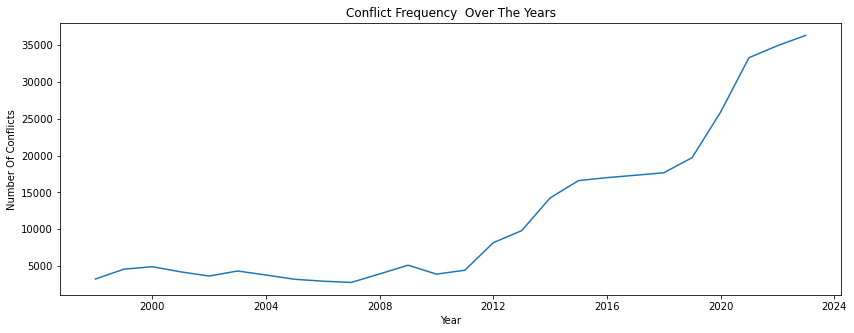

In [14]:
#How has conflict freq changed over the years
plt.figure(figsize=(14,5))
plt.title("Conflict Frequency  Over The Years")
plt.xlabel("Year")
plt.ylabel("Number Of Conflicts")
plt.plot(yearly_freq);

**Observations**
The number of conflicts per year has been increasing since 1997.There were relatively stable fluctuations in  number of conflicts from 1997 to 2011.Then the increase started becoming steeper after 2012

## Monthly Conflict Patterns

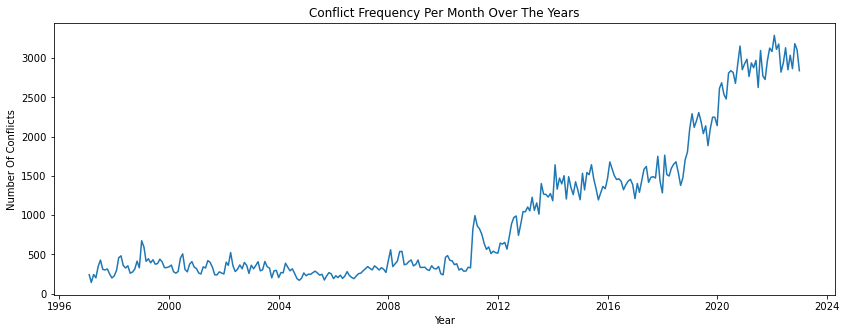

In [15]:
# Plot the time series to see how the conflict frequency per month has changed over the years
plt.figure(figsize=(14,5))
plt.title("Conflict Frequency Per Month Over The Years")
plt.xlabel("Year")
plt.ylabel("Number Of Conflicts")
plt.plot(monthly_freq);

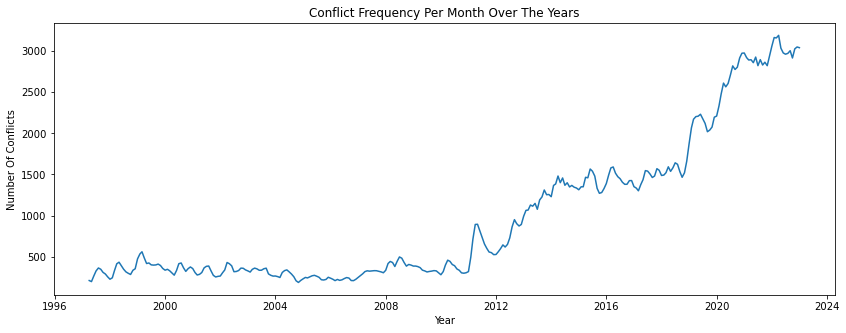

In [16]:
#Smooth out the curve using rolling average
plt.figure(figsize=(14,5))
plt.title("Conflict Frequency Per Month Over The Years")
plt.xlabel("Year")
plt.ylabel("Number Of Conflicts")
monthly_rolling = monthly_freq.rolling(3).mean()
plt.plot(monthly_rolling);

**Observations**
The number of conflicts per month is increasing over the years, this follows a similar pattern to the number of conflicts per year.

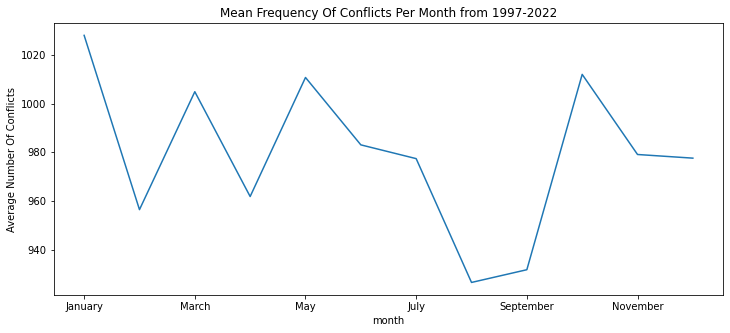

In [17]:
## Now lets look at how  the number of conflicts vary per month over a year
#first calculate the average number of conflicts for each month then plot them
monthly_means =df.groupby(["year","month"])["month"].count()
monthly_means = round(monthly_means.groupby("month").mean(),2)
monthly_means = monthly_means.reindex(index=months)
plt.figure(figsize=(12,5))
monthly_means.plot(kind="line")
plt.title("Mean Frequency Of Conflicts Per Month from 1997-2022")
plt.ylabel("Average Number Of Conflicts");

**Observations**
The average number of conflicts fluctauate and increase over several months in the year.
January,March ,May and October tend to have the highest number of conflicts .
The number of conflicts tend to decrease from May to August.These are winter months
This might suggest that there might be some seasonal variation of conflicts frequency .
But the pattern is not very appearantt as its only in winter that we notice the biggest deep.So we test the hypothesis that there might be seasonal variation of conflicts

In [26]:
##Select only the relevant columns to make visualising the data easier and less cluttered
event_month =df[["event_type","month"]]
event_month

,event_type,month
0,Battles,December
1,Strategic developments,December
2,Violence against civilians,December
3,Battles,December
4,Violence against civilians,December
...,...,...
305474,Battles,January
305475,Battles,January
305476,Violence against civilians,January
305477,Battles,January


In [51]:
#Group the event_types by month and find the number of occurance of each event type for each month
event_grouping = event_month.groupby(["event_type","month"]).size()
event_grouping

event_type                  month    
Battles                     April        6655
                            August       6470
                            December     6816
                            February     6000
                            January      6719
                                         ... 
Violence against civilians  March        6751
                            May          6601
                            November     6225
                            October      6062
                            September    5983
Length: 72, dtype: int64

In [52]:
#convert the resulting table into a dataframe
event_grouping = event_grouping.to_frame(name="count").reset_index()
event_grouping

,event_type,month,count
0,Battles,April,6655
1,Battles,August,6470
2,Battles,December,6816
3,Battles,February,6000
4,Battles,January,6719
...,...,...,...
67,Violence against civilians,March,6751
68,Violence against civilians,May,6601
69,Violence against civilians,November,6225
70,Violence against civilians,October,6062


In [55]:
#Reshape the dataframe using a pivot table
event_grouping = event_grouping.pivot_table(values='count',columns='event_type',index='month',fill_value=0)
event_grouping

event_type,Battles,Explosions/Remote violence,Protests,Riots,Strategic developments,Violence against civilians
month,,,,,,
April,6655,2109,5547,2845,1603,6248
August,6470,1935,5221,2666,1881,5916
December,6816,1740,6017,2304,2192,6348
February,6000,1788,6412,2752,1827,6088
January,6719,1973,6189,3281,1898,6669
July,6660,1928,5499,2917,1793,6615
June,6967,1863,5733,2590,1950,6456
March,6558,1873,6285,2858,1802,6751
May,6599,2103,6151,2959,1866,6601


In [53]:
#Reindex the dataframe
event_grouping = event_grouping.reindex(sorted(event_grouping.columns),axis=1)
event_grouping

,count,event_type,month
0,6655,Battles,April
1,6470,Battles,August
2,6816,Battles,December
3,6000,Battles,February
4,6719,Battles,January
...,...,...,...
67,6751,Violence against civilians,March
68,6601,Violence against civilians,May
69,6225,Violence against civilians,November
70,6062,Violence against civilians,October


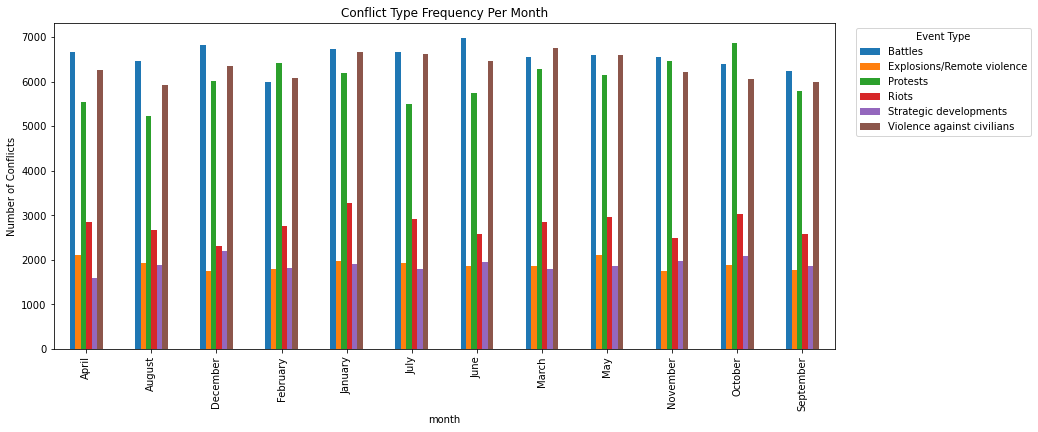

In [56]:
#Plot dataframe on a bar graph
event_grouping.plot(kind='bar',  figsize=(14, 6))
plt.legend(title='Event Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title("Conflict Type Frequency Per Month")
plt.ylabel("Number of Conflicts");

In [57]:
#The baove graph is not very easy to visualise so lets reorder the conflict types from the ones in descending order
columns = ["Battles","Violence against civilians","Protests","Riots","Strategic developments","Explosions/Remote violence"]
event_grouping = event_grouping[columns]
event_grouping= event_grouping.reindex(months)
event_grouping

event_type,Battles,Violence against civilians,Protests,Riots,Strategic developments,Explosions/Remote violence
month,,,,,,
January,6719,6669,6189,3281,1898,1973
February,6000,6088,6412,2752,1827,1788
March,6558,6751,6285,2858,1802,1873
April,6655,6248,5547,2845,1603,2109
May,6599,6601,6151,2959,1866,2103
June,6967,6456,5733,2590,1950,1863
July,6660,6615,5499,2917,1793,1928
August,6470,5916,5221,2666,1881,1935
September,6235,5983,5788,2576,1860,1783


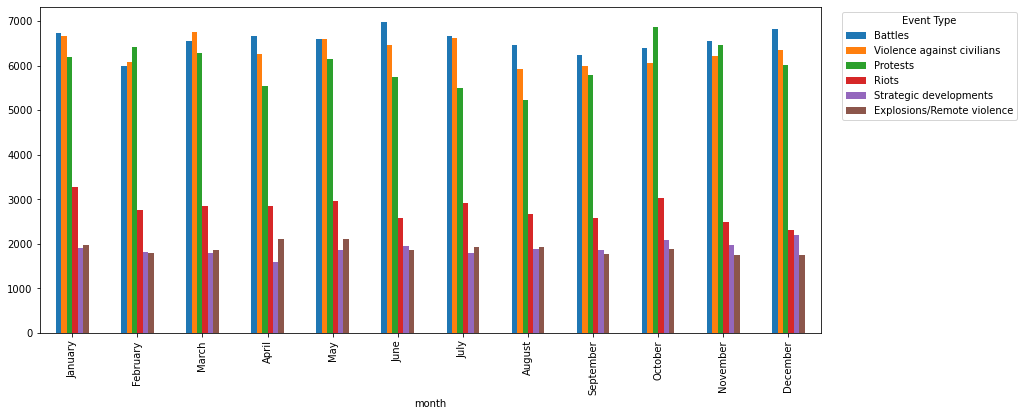

In [58]:
#Plot the new graph
event_grouping.plot(kind='bar',  figsize=(14, 6))
plt.legend(title='Event Type', bbox_to_anchor=(1.02, 1), loc='upper left');

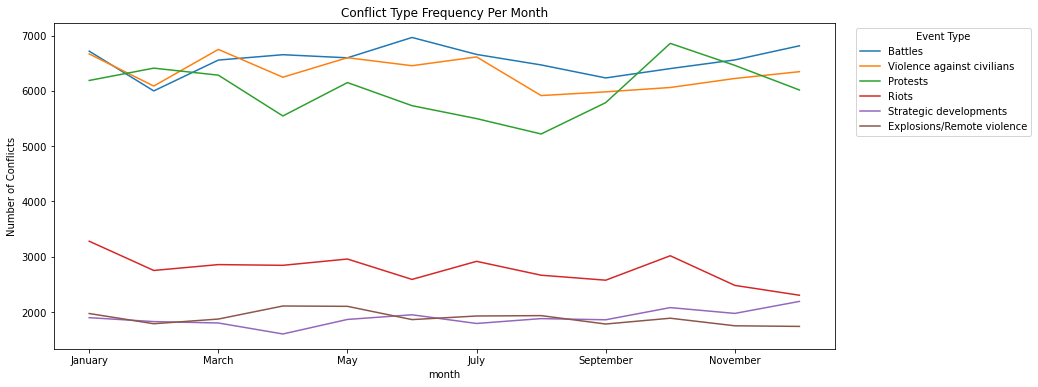

In [60]:
event_grouping.plot(kind='line',  figsize=(14, 6))
plt.legend(title='Event Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title("Conflict Type Frequency Per Month")
plt.ylabel("Number of Conflicts");

**Observations**
Battles ,Violence against civilians and Protests are the most common conflict types
Battles  are the highest conflict type in most months.
Strategic deployments and remote explosions are the lest frequent conflict types across all months
October tend to have an unusually  number of Protests
Most conflicts tend to decrease in February , except for Protests.While all conflicts start on a relatively high frequency in January,Protests starts lower but then begin to rise towards Frebruary as other conflicts begin to decrease
Number of protests significantly decrease in winter ie from May to August
Some confl

#### Is there a seasonal variation of conflicts?

**Hypothesis**
H0 : There is no seasonal pattern in the frequency of conflict events
H1 : There is a seasonal pattern in the frequency of conflict events
Significance level : 0.05

In [18]:
#Create a contingency table to calculate the frequency of conflicts in each season
season_freq = pd.crosstab(index=df["season"], columns='count')
season_freq

col_0,count
season,
autumn,77413
spring,75993
summer,77013
winter,75060


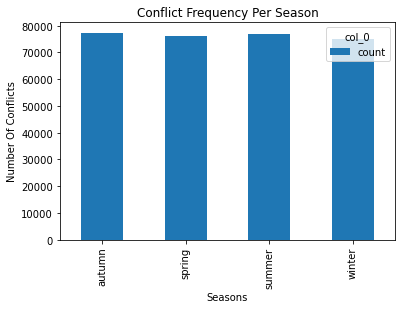

In [19]:
#Visualize this on a bar chart
season_freq.plot(kind="bar")
plt.ylabel("Number Of Conflicts")
plt.xlabel("Seasons")
plt.title("Conflict Frequency Per Season");

**Observation**
There seem to be very variation in the number of conflicts per season.
Winter is the only season with a slightly bigger drop than the other seasons

<Figure size 1440x1440 with 0 Axes>

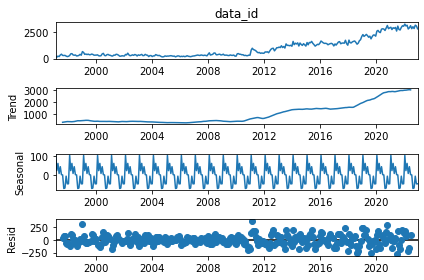

In [20]:
# Perform a seasonal decomposition of the monthly conflict events using STL
import statsmodels.api as sm


stl = sm.tsa.seasonal_decompose(monthly_freq, model='additive', freq=12)
plt.figure(figsize=(20, 20))
stl.plot()
plt.show();

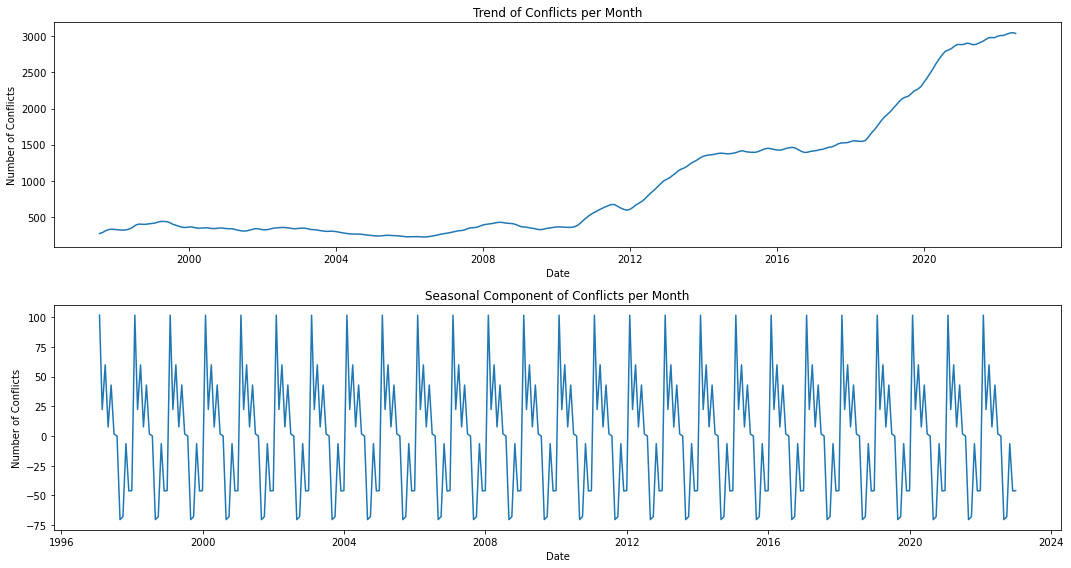

In [21]:
#To better visualize the plots lets plot only the trend and seasonal components
fig , (ax1,ax2) = plt.subplots(2,1,figsize=(15, 8))
ax1.plot(stl.trend)
ax1.set_title('Trend of Conflicts per Month')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Conflicts')

# Plot the seasonal component on the second subplot
ax2.plot(stl.seasonal)
ax2.set_title('Seasonal Component of Conflicts per Month')
ax2.set_xlabel('Date')
ax2.set_ylabel('Number of Conflicts')

plt.tight_layout()
plt.show()

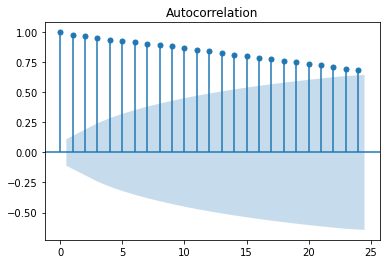

In [22]:
#Calculate the autocorrelation function of the monthly conflict events
acf = sm.graphics.tsa.plot_acf(monthly_freq, lags=24)
acf.show()

In [23]:
## Test the hypothesis that there is a seasonal variation in the frequency of conflicts
from scipy.stats import chi2_contingency

# calculate the test statistic and p-value
chi2_stat, p_val, dof, expected = chi2_contingency(season_freq)
if( p_val < 0.05):
    print("Reject the null hypothesis.There is signficant evidence of a seasonal pattern in the frequency of conflict events")
else :
    print("Fail to reject the null hypothesis.There is insignificant evidence to support that there is a seasonal pattern in the  frequency of conflict events")

Fail to reject the null hypothesis.There is insignificant evidence to support that there is a seasonal pattern in the  frequency of conflict events


**Observations**
From this we can conclude that there is no seasonal variation in the frequency of conflict but rather conflict can occur anytime of the year with no season having the greatest concentration

In [24]:
df["event_type"].unique()

array(['Battles', 'Strategic developments', 'Violence against civilians',
       'Riots', 'Protests', 'Explosions/Remote violence'], dtype=object)

In [25]:
df

,data_id,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,...,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,month,day,season
0,9713929,2022-12-31,2022,1,Battles,Armed clash,M23: March 23 Movement,NaN,Rebel Groups,Military Forces of the Democratic Republic of ...,...,28.5950,1,Mediacongo.net; Radio Okapi; RFI; Twitter,New media-National,"On 31 December 2022, during a two-day battle, ...",0,2023-01-09 19:04:45,December,31,summer
1,9713930,2022-12-31,2022,1,Strategic developments,Other,East African Community Joint Regional Force to...,ICGLR: International Conference on the Great L...,External/Other Forces,NaN,...,29.3460,1,7 Sur 7; Actualite; Election-Net; La Prunelle;...,New media-National,"Other: On 31 December 2022, the leadership of ...",0,2023-01-09 19:04:45,December,31,summer
2,9713931,2022-12-31,2022,1,Violence against civilians,Abduction/forced disappearance,Twirwaneho Ethnic Militia (Democratic Republic...,Banyamulenge Ethnic Militia (Democratic Republ...,Identity Militias,Civilians (Democratic Republic of Congo),...,28.4476,1,Kivu Times,Subnational,"On 31 December 2022, Twirwaneho abducted a wom...",0,2023-01-09 19:04:45,December,31,summer
3,9713933,2022-12-31,2022,1,Battles,Armed clash,M23: March 23 Movement,NaN,Rebel Groups,Military Forces of the Democratic Republic of ...,...,29.0655,2,Mediacongo.net; Radio Okapi,National,"On 31 December 2022, during a two-day battle, ...",0,2023-01-09 19:04:45,December,31,summer
4,9714388,2022-12-31,2022,2,Violence against civilians,Attack,Police Forces of Ethiopia (2018-) Oromo Region...,NaN,State Forces,Civilians (Ethiopia),...,35.5128,2,Oromiya Media Network,International,"Around 31 December 2022 (as reported), governm...",3,2023-01-09 19:04:47,December,31,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305474,9695770,1997-01-01,1997,3,Battles,Government regains territory,Military Forces of Sierra Leone (1996-1997),NaN,State Forces,RUF: Revolutionary United Front,...,-10.9332,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,2022-12-06 00:34:11,January,01,summer
305475,9695771,1997-01-01,1997,3,Battles,Armed clash,Kamajor Militia,NaN,Political Militias,RUF: Revolutionary United Front,...,-11.7047,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,2022-12-06 00:34:11,January,01,summer
305476,9695772,1997-01-01,1997,3,Violence against civilians,Attack,Military Forces of Sierra Leone (1996-1997),NaN,State Forces,Civilians (Sierra Leone),...,-12.4694,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,2022-12-06 00:34:11,January,01,summer
305477,9695773,1997-01-01,1997,3,Battles,Armed clash,Kamajor Militia,NaN,Political Militias,Military Forces of Sierra Leone (1996-1997),...,-12.3380,2,SL-LED; No Peace Without Justice,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,2022-12-06 00:34:11,January,01,summer
